In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("Churn_Modelling.csv")

In [55]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
for col in data.columns:
    print(" col_name : ", col, "unique percentage : ", len(data[col].unique())/len(data))

 col_name :  RowNumber unique percentage :  1.0
 col_name :  CustomerId unique percentage :  1.0
 col_name :  Surname unique percentage :  0.2932
 col_name :  CreditScore unique percentage :  0.046
 col_name :  Geography unique percentage :  0.0003
 col_name :  Gender unique percentage :  0.0002
 col_name :  Age unique percentage :  0.007
 col_name :  Tenure unique percentage :  0.0011
 col_name :  Balance unique percentage :  0.6382
 col_name :  NumOfProducts unique percentage :  0.0004
 col_name :  HasCrCard unique percentage :  0.0002
 col_name :  IsActiveMember unique percentage :  0.0002
 col_name :  EstimatedSalary unique percentage :  0.9999
 col_name :  Exited unique percentage :  0.0002


In [58]:
data.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace= True)
data.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) in 'objects':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [60]:
# one_hot_encoding (optional)
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data["Geography"].values.reshape(-1,1)).toarray()

#values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]
data = data.drop(["Geography"], axis = 1)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [61]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [62]:
#Feature and Target vectors
X = data[remaining_columns].values
Y = data['Exited'].values.astype(np.uint8)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= .2, random_state= 42)

In [64]:
X_train.shape

(8000, 12)

In [65]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

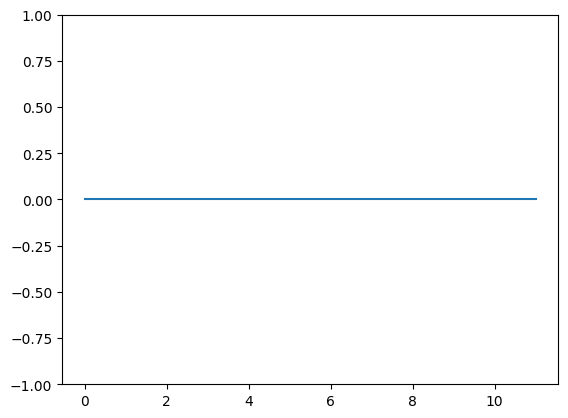

In [66]:
# check whether data is standardized or not
#mean should  be 0
plt.ylim(-1,1)
means = []
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))

plt.plot(means, scaley = False)

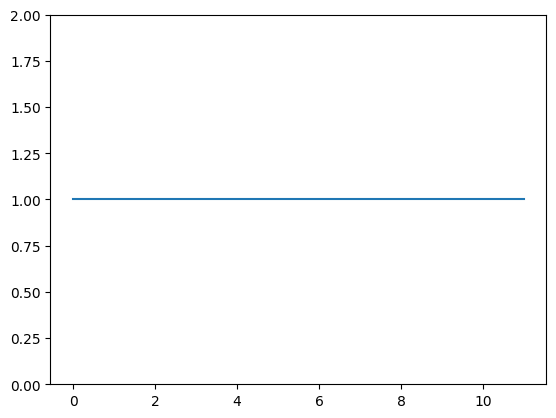

In [67]:
#check variance
plt.ylim(0,2)
vars = []
for i in range(X.shape[1]):
    vars.append(np.var(X_test[:,i]))

plt.plot(vars)

Feature Selection

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model,step = 1, min_features_to_select = 6, n_jobs = -1)
rfecv.fit(X_train, y_train)

RFECV(estimator=LogisticRegression(), min_features_to_select=6, n_jobs=-1)

In [69]:
rfecv.support_

array([False,  True,  True, False,  True, False, False,  True, False,
        True,  True,  True])

In [70]:
rfecv.ranking_

array([2, 1, 1, 4, 1, 3, 6, 1, 5, 1, 1, 1])

In [71]:
selected_features = np.where(rfecv.support_)[0]
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

In [72]:
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
model.score(X_test, y_test)

0.8115

HYPERPARAMTER TUNING

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model,step = 1, min_features_to_select = 4, n_jobs = -1)
rfecv.fit(X_train, y_train)

RFECV(estimator=LogisticRegression(), min_features_to_select=4, n_jobs=-1)

In [75]:
selected_features = np.where(rfecv.support_)[0]
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

In [76]:
param_grid = {'penalty' : ['l2'],
        'C' : [1.0, 2.0, 3.0],
        'max_iter' : [100, 200, 300, 500],
        'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga']}
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [100, 200, 300, 500],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [77]:
grid_search.best_params_

{'C': 3.0, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}

In [78]:
grid_search.score(X_test, y_test)

0.8115

Cross Validation

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model,step = 1, min_features_to_select = 4, n_jobs = -1)
rfecv.fit(X,Y)

c:\Users\fb190\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\fb190\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

RFECV(estimator=LogisticRegression(), min_features_to_select=4, n_jobs=-1)

In [80]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5)
test_scores = []

for train_idx, test_idx in k_fold.split(X):
    X_train = X[train_idx]
    y_train = Y[train_idx]

    X_test = X[test_idx]
    y_test = Y[test_idx]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    test_scores.append(model.score(X_test, y_test))


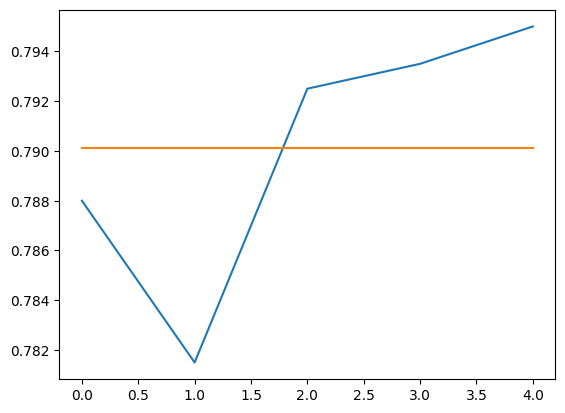

Cross validation score :  0.7901


In [81]:
import matplotlib.pyplot as plt

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()
print("Cross validation score : ", np.mean(test_scores))

Accuracy Score

In [82]:
Predictions = model.predict(X_test)

def Accuracy(Thruths, Predictions):
    return np.mean(Thruths == Predictions)

Accuracy(y_test, Predictions)



0.795

Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

def precision(label, confusion_matrix):
    col = confusion_matrix[: , label]
    return confusion_matrix[label, label] / col.sum()

def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label,label] / row.sum()

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)
    


<AxesSubplot:>

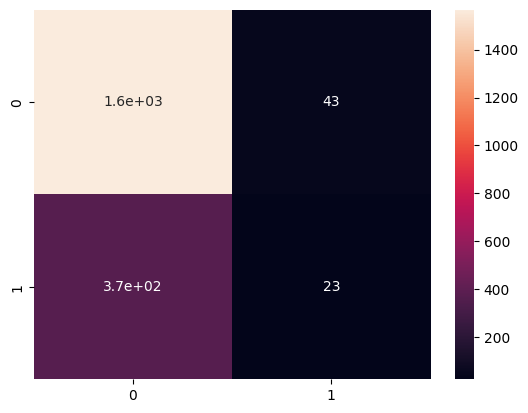

In [84]:
import seaborn as sns
matrix = confusion_matrix(y_test, Predictions)
sns.heatmap(matrix, annot = True)

In [85]:
precision(1, matrix) , recall(1 , matrix)

(0.3484848484848485, 0.05897435897435897)

In [86]:
print(f'Accuracy Score : {accuracy_score(y_test, Predictions)}')
print(f'confusion_matrix : \n{confusion_matrix(y_test, Predictions)}')
print(f'Area Under Curve : {roc_auc_score(y_test, Predictions)}')
print(f'Recall Score : {recall_score(y_test, Predictions)}')

Accuracy Score : 0.795
confusion_matrix : 
[[1567   43]
 [ 367   23]]
Area Under Curve : 0.5161331422200988
Recall Score : 0.05897435897435897


Weighting Labels

In [87]:
# finding class weights
value_counts = dict(data['Exited'].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [88]:
class_weights = {}
for key , value in value_counts.items():
    class_weights[key] = sum(value_counts.values()) - value / sum(value_counts.values())

class_weights

{0: 9999.2037, 1: 9999.7963}

In [89]:
class_weights = {0: 20.37,
                 1: 79.73}

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

predictions = model.predict(X_test) 

In [91]:
Accuracy(y_test, predictions)

0.646

<AxesSubplot:>

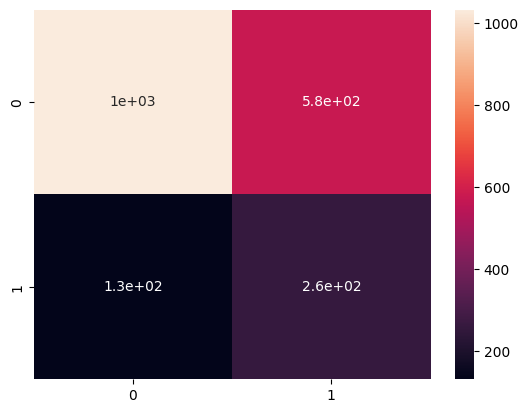

In [92]:
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot = True)

In [93]:
precision(1, matrix) , recall(1 , matrix)

(0.30980861244019137, 0.6641025641025641)

In [94]:
print(f'Accuracy Score : {accuracy_score(y_test, predictions)}')
print(f'confusion_matrix : \n{confusion_matrix(y_test, predictions)}')
print(f'Area Under Curve : {roc_auc_score(y_test, predictions)}')
print(f'Recall Score : {recall_score(y_test, predictions)}')

Accuracy Score : 0.646
confusion_matrix : 
[[1033  577]
 [ 131  259]]
Area Under Curve : 0.6528587354674311
Recall Score : 0.6641025641025641


ROC Curve 

a) plot the "ROC" for two models and calculate the "AUC" of each graph \
b) select the model that has higher "AUC"

In [95]:
model = LogisticRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
pred_probs = model.predict_proba(X_test)

In [96]:
pred_probs[:3]

array([[0.88794573, 0.11205427],
       [0.91228325, 0.08771675],
       [0.81986897, 0.18013103]])

In [97]:
pred_probs = pred_probs[: , 1]

Metrics

[[1567   43]
 [ 367   23]]


<AxesSubplot:>

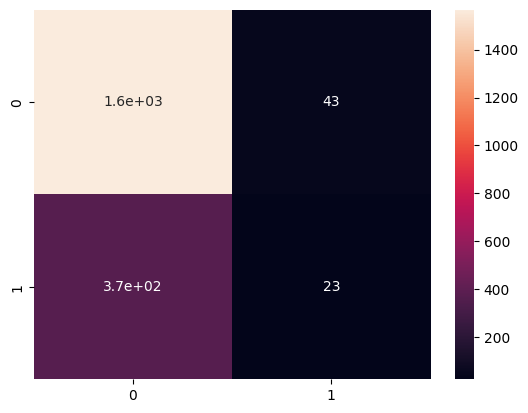

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix

matrix = confusion_matrix(y_test, predictions)

print(matrix)
sns.heatmap(matrix, annot = True)

In [99]:

def Accuracy(Thruths, Predictions):
    return np.mean(Thruths == Predictions)

print("Validation Accuracy : " ,Accuracy(y_test, predictions))

Validation Accuracy :  0.795


In [100]:
#Checking Precision
print("Precision : ", precision_score(y_test, predictions))

Precision :  0.3484848484848485


In [101]:
#Checking recall
print("Recall : ", recall_score(y_test, predictions))

Recall :  0.05897435897435897


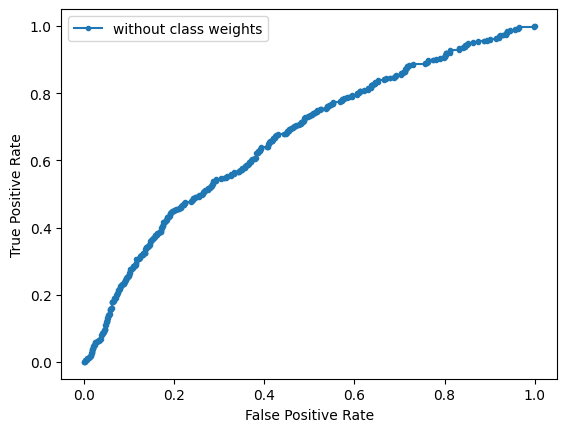

In [102]:
Fpr, Tpr, _ = roc_curve(y_test, pred_probs)

plt.plot(Fpr, Tpr, marker = ".", label = "without class weights")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [103]:
Auc = roc_auc_score(y_test, pred_probs)
print("Area Under Curve : ",Auc )

Area Under Curve :  0.6651345755693583
